In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

%matplotlib inline

In [2]:
price = pd.read_csv('house_prices.csv')


price.describe()

,Rooms,Price,Propertycount,Distance
count,52964.000000,4.119600e+04,52964.000000,52964.000000
mean,3.115512,1.001993e+06,7610.820595,12.704475
std,0.960792,6.033969e+05,4414.860634,7.631408
min,1.000000,8.500000e+04,39.000000,0.000000
25%,3.000000,6.170000e+05,4380.000000,7.000000
50%,3.000000,8.350000e+05,6795.000000,11.400000
75%,4.000000,1.225000e+06,10412.000000,16.700000
max,31.000000,1.120000e+07,21650.000000,65.000000


In [3]:
price.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
print(price.columns.values)
print('No. variables:', len(price.columns.values))

['Suburb' 'Address' 'Rooms' 'Type' 'Price' 'Method' 'SellerG' 'Date'
 'Regionname' 'Propertycount' 'Distance' 'CouncilArea']
No. variables: 12


In [5]:
price1 = price.drop(['Method', 'Date', 'SellerG', 'Type', 'Address'], 1)

In [6]:
price1.head()

,Suburb,Rooms,Price,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,3,1490000.0,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,3,1220000.0,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,3,1420000.0,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,3,1515000.0,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,2,670000.0,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [16]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()

price1['Regionname'] = number.fit_transform(price1['Regionname'].astype('str'))

In [17]:
price1['Suburb'] = number.fit_transform(price1['Suburb'].astype('str'))

In [37]:
price1['CouncilArea'] = number.fit_transform(price1['CouncilArea'].astype('str'))

In [38]:
price1.isnull().sum()

Suburb           0
Rooms            0
Price            0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [39]:
price1 = price1.fillna(price1.mean())

In [40]:
price1.isnull().sum()

Suburb           0
Rooms            0
Price            0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

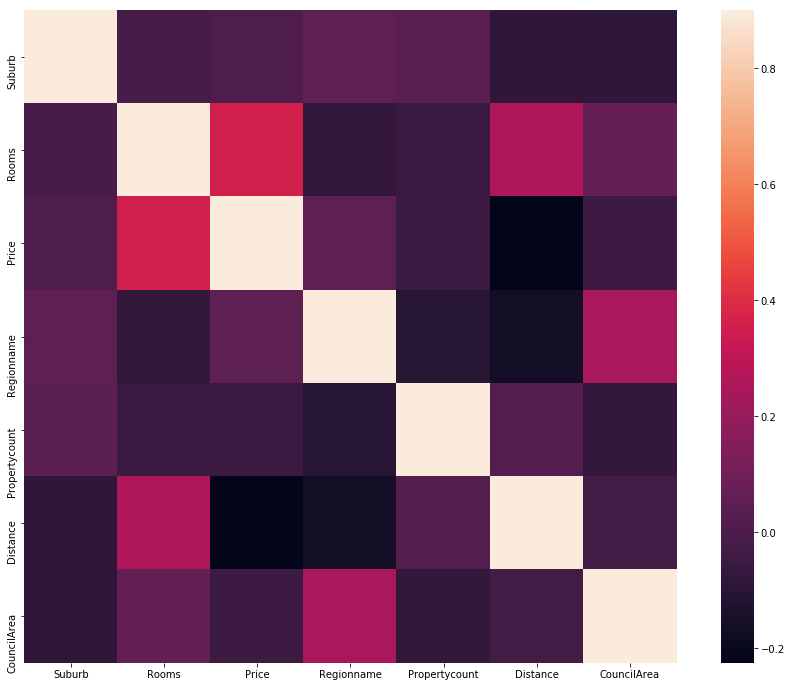

In [41]:
matrix = price1.corr()
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(matrix, vmax=0.9,square=True)

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

pred_var = price1.drop(['Price'], 1)

target_var = price1['Price']

In [43]:
X = pred_var
y = target_var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [47]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

predicted_train = model.predict(X_train)
predicted_test = model.predict(X_test)
    
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
    
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Test data R-2 score:  0.45
Test data Spearman correlation: 0.732
Test data Pearson correlation: 0.671
